In [288]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import tqdm

import sys
sys.path.append('../')
from model import nn_tools
from utils import utils
import matplotlib as mpl

In [289]:
def get_step(ckpt_path):
    return int(os.path.split(ckpt_path)[1].split("step=")[1].split(".ckpt")[0])

In [290]:
ts=torch.linspace(0,1,1000)

In [291]:
ckpt_dir="../data/comet_logs/Mstar2Mcdm-2D-new/9639746a3f1f4fbaa1544256ced1d3ae/checkpoints/"
gamma_min=-13.3
gamma_max=5.0

gammas={}
for ckpt_path in tqdm.tqdm(glob.glob(os.path.join(ckpt_dir,"*.ckpt"))):
    step=get_step(ckpt_path)
    ckpt = torch.load(ckpt_path,map_location=torch.device('cpu'))
    std_gamma={}
    for key,val in ckpt["state_dict"].items():
        if "model.gamma" in key:
            std_gamma[key.split("model.gamma.")[1]]=val
    get_gamma=nn_tools.LearnedLinearSchedule(gamma_min,gamma_max)
    get_gamma.load_state_dict(std_gamma)
    gamma=get_gamma(ts[:,None])[:,0]
    gamma=utils.to_np(gamma)
    gammas[step]=gamma
#sort dict by step
gammas=dict(sorted(gammas.items(), key=lambda item: item[0]))

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [04:58<00:00, 14.94s/it]


Text(0.5, 1.0, 'Learned Linear Schedule')

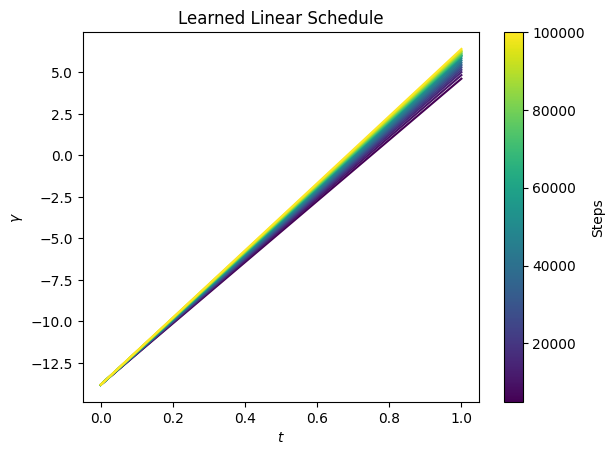

In [292]:
cmap=plt.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(gammas.keys()), vmax=max(gammas.keys()))
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,gamma,color=cmap((step-min_step)/step_range))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("Learned Linear Schedule")

In [293]:
ckpt_dir="../data/comet_logs/Mstar2Mcdm-2D-new/7b8dbf0a7db04c38830549d1befe8195/checkpoints/"
gamma_min=-13.3
gamma_max=5.0

gammas={}
for ckpt_path in tqdm.tqdm(glob.glob(os.path.join(ckpt_dir,"*.ckpt"))):
    step=get_step(ckpt_path)
    ckpt = torch.load(ckpt_path,map_location=torch.device('cpu'))
    std_gamma={}
    for key,val in ckpt["state_dict"].items():
        if "model.gamma" in key:
            std_gamma[key.split("model.gamma.")[1]]=val
    get_gamma=nn_tools.NNSchedule(gamma_min,gamma_max)
    get_gamma.load_state_dict(std_gamma)
    gamma=get_gamma(ts[:,None])[:,0]
    gamma=utils.to_np(gamma)
    gammas[step]=gamma
#sort dict by step
gammas=dict(sorted(gammas.items(), key=lambda item: item[0]))

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [07:10<00:00, 21.50s/it]


Text(0.5, 1.0, 'Learned NN Schedule')

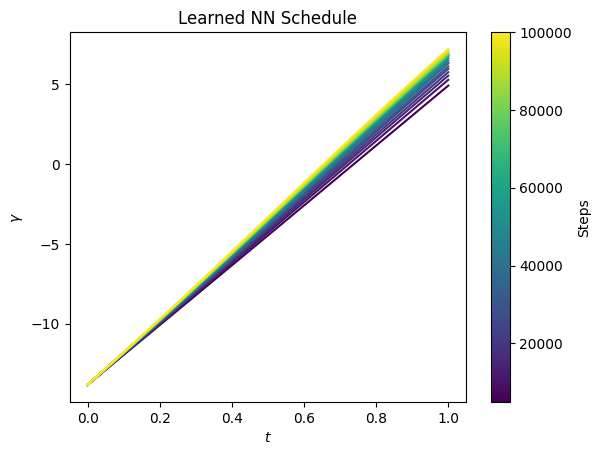

In [298]:
cmap=plt.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(gammas.keys()), vmax=max(gammas.keys()))
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,gamma,color=cmap((step-min_step)/step_range))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("Learned NN Schedule")

Text(0.5, 1.0, 'Learned NN Schedule')

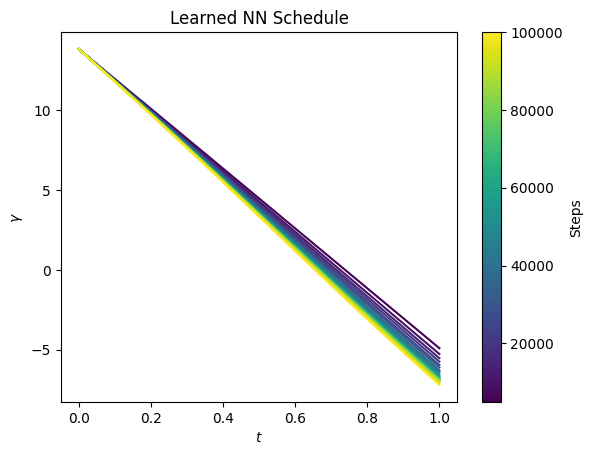

In [300]:
cmap=plt.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=min(gammas.keys()), vmax=max(gammas.keys()))
fig,ax=plt.subplots()
for step,gamma in gammas.items():
    ax.plot(ts,-gamma,color=cmap((step-min_step)/step_range))
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Steps')
plt.xlabel(r"$t$")
plt.ylabel(r"$\gamma$")
plt.title("Learned NN Schedule")

In [240]:
import importlib
importlib.reload(nn_tools)

<module 'model.nn_tools' from '/n/home12/cfpark00/Diffusion/vdm4cdm/analysis/../model/nn_tools.py'>

In [241]:
gamma_min=-12.5
gamma_max=5.5
ts=torch.linspace(0,1,1000)
get_gamma=nn_tools.NNSchedule(gamma_min,gamma_max,mid_dim=2,gamma_min_max=-8)
gamma=utils.to_np(get_gamma(ts[:,None])[:,0])
ys=ts

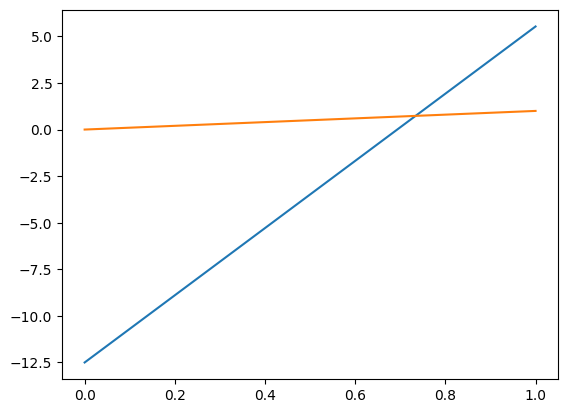

In [242]:
plt.plot(ts,gamma)
plt.plot(ts,ys)

In [243]:
opt=torch.optim.Adam(get_gamma.parameters(),lr=1e-3)

In [247]:
for i in range(10000):
    opt.zero_grad()
    gamma=get_gamma(ts[:,None])[:,0]
    loss=torch.mean((gamma[500:]-ys[500:])**2)
    loss.backward()
    opt.step()
    if i%100==0:
        print(loss.item())

0.9317201375961304
0.9069150686264038
0.8824976086616516
0.8584659695625305
0.8348183035850525
0.8115532994270325
0.7886690497398376
0.7661638855934143
0.7440364956855774
0.7222849130630493
0.7009072303771973
0.6799019575119019
0.6592671871185303
0.6390013694763184
0.6191032528877258
0.5995703339576721
0.5804011225700378
0.5615940093994141
0.5431466698646545
0.5250583291053772
0.5073266625404358
0.4899495840072632
0.4729260206222534
0.4562534689903259
0.4399302899837494
0.42395496368408203
0.4083256423473358
0.3930397629737854
0.37809619307518005
0.36349281668663025
0.3492279052734375
0.3352990746498108
0.3217047154903412
0.3084426522254944
0.295510858297348
0.2829071581363678
0.27062955498695374
0.2586759328842163
0.24704387784004211
0.23573122918605804
0.22473590075969696
0.21405525505542755
0.2036868929862976
0.19362865388393402
0.18387767672538757
0.17443150281906128
0.16530300676822662
0.15647317469120026
0.14793790876865387
0.13969412446022034
0.13173934817314148
0.12407055497169

(tensor(-8., grad_fn=<SelectBackward0>),
 tensor(1.0139, grad_fn=<SelectBackward0>))

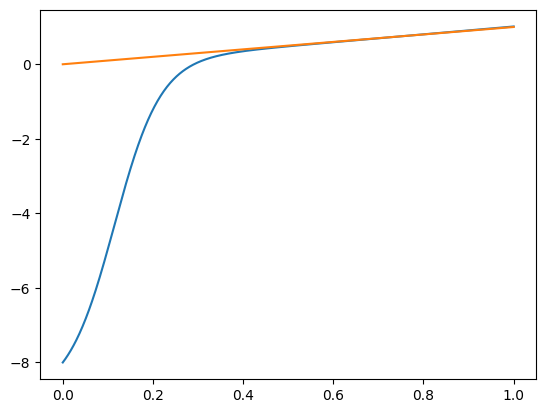

In [248]:
ts_np=utils.to_np(ts)
plt.plot(ts_np,utils.to_np(gamma))
plt.plot(ts_np,utils.to_np(ys))
gamma[0],gamma[-1]

In [175]:
ts=torch.linspace(0,1,1000)
get_gamma=nn_tools.NNSchedule(gamma_min,gamma_max,mid_dim=2)
with torch.no_grad():
    #print(get_gamma.l2.weight.shape)
    get_gamma.l1.weight[...]=0
    get_gamma.l1.bias[...]=0
    get_gamma.l2.weight[0,0]=10
    get_gamma.l2.weight[1,0]=10
    get_gamma.l2.bias[0]=10*(-0.3)
    get_gamma.l2.bias[1]=10*(0.3)
    get_gamma.l3.weight[0,0]=20
    get_gamma.l3.weight[0,1]=20
gamma=utils.to_np(get_gamma(ts[:,None])[:,0])

In [176]:
(torch.abs(get_gamma.l3.weight[0,1])+torch.abs(get_gamma.l3.weight[0,0]))/2

tensor(20., grad_fn=<DivBackward0>)

19.981735

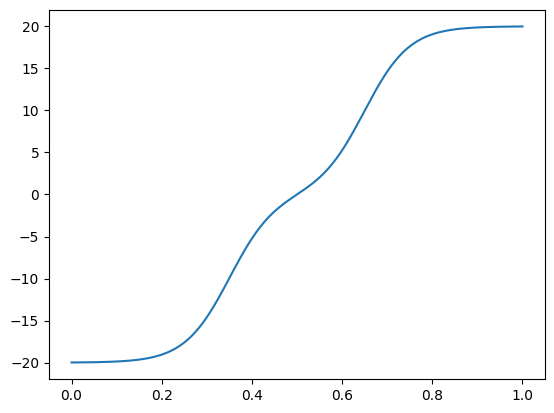

In [177]:
plt.plot(ts,gamma)
gamma[-1]